In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from algorithms.generalised_delta import TwoLP

In [2]:
def f(x,y):
    return np.exp(-(x**2+y**2)/10)-0.5

In [3]:
x = np.arange(-5,5,0.5)
y = np.arange(-5,5,0.5)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

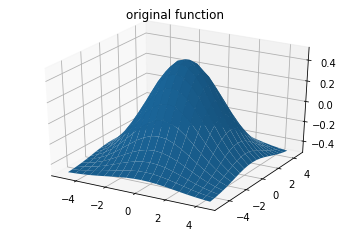

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z)
plt.title('original function')
plt.show()

## train with different numbers of hidden nodes 

In [5]:
tempX = X.reshape(1,400)
tempY = Y.reshape(1,400)
target = Z.reshape(400,)
data = np.concatenate((tempX,tempY),axis=0)


In [6]:
nodes = 15
lr = 0.1
tlp = TwoLP(nodes_num=nodes, output_dim=1, features_num=3, lr=lr)
tlp.train(data.T, target, epochs=400)

Epoch 0, MSE:0.04988229853884553
Epoch 1, MSE:0.1419193592350457
Epoch 2, MSE:0.08682889314656413
Epoch 3, MSE:0.09373408462119372
Epoch 4, MSE:0.04478432517677623
Epoch 5, MSE:0.05553319154319237
Epoch 6, MSE:0.09603952025097598
Epoch 7, MSE:0.023169301413433974
Epoch 8, MSE:0.06560808822372995
Epoch 9, MSE:0.04205113591492716
Epoch 10, MSE:0.04877940676521206
Epoch 11, MSE:0.020511559495392895
Epoch 12, MSE:0.03750426246779261
Epoch 13, MSE:0.01597645686442796
Epoch 14, MSE:0.02870291965303527
Epoch 15, MSE:0.008547885702410735
Epoch 16, MSE:0.023288056572306145
Epoch 17, MSE:0.009436735510841607
Epoch 18, MSE:0.016317666549645685
Epoch 19, MSE:0.017143482238608856
Epoch 20, MSE:0.010776023279999675
Epoch 21, MSE:0.020530545467099405
Epoch 22, MSE:0.017701108029623193
Epoch 23, MSE:0.040669880363428286
Epoch 24, MSE:0.033582364512457434
Epoch 25, MSE:0.011584757755581527
Epoch 26, MSE:0.016233141898250297
Epoch 27, MSE:0.03627018053767919
Epoch 28, MSE:0.07599457709810778
Epoch 29, M

In [7]:
data = data.T
data = np.c_[data, np.ones(data.shape[0])]
data = data.T

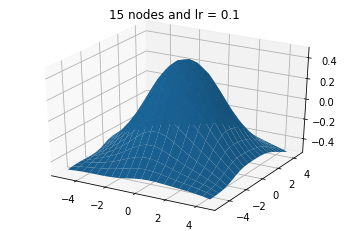

In [8]:
_, out = tlp.forward_pass(data)
Z2 = out.reshape(20,20)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z2)
plt.title(f'{nodes} nodes and lr = {lr}')
plt.show()

### train with just a subset

In [9]:
def get_subset(X,Y,Z,size):
    n = len(Z)
    idx = np.sort(np.random.choice(range(n),size,replace=False))
    subX = X[0][idx]
    subY = Y[0][idx]
    subZ = Z[idx]
    return subX, subY, subZ

In [10]:
p = 0.2
size = int(p*400)
subX,subY,subZ = get_subset(tempX,tempY,target,size)

In [11]:
subX = subX.reshape(1,size)
subY = subY.reshape(1,size)
subZ = subZ.reshape(size,)
subdata = np.concatenate((subX,subY),axis=0)

In [12]:
tlp = TwoLP(nodes_num=25, output_dim=1, features_num=3, lr=0.1)
tlp.train(subdata.T, subZ, epochs=400)

Epoch 0, MSE:0.11026406066870295
Epoch 1, MSE:0.057650790329963855
Epoch 2, MSE:0.06923633879118982
Epoch 3, MSE:0.07298858236188883
Epoch 4, MSE:0.05874099518344419
Epoch 5, MSE:0.05359729860914094
Epoch 6, MSE:0.06386223211790346
Epoch 7, MSE:0.05384409769179479
Epoch 8, MSE:0.029046725183374106
Epoch 9, MSE:0.03564191566741579
Epoch 10, MSE:0.04270585454201022
Epoch 11, MSE:0.03370442034360148
Epoch 12, MSE:0.02940822662793587
Epoch 13, MSE:0.03063119405635112
Epoch 14, MSE:0.025862068810441834
Epoch 15, MSE:0.019700956171363193
Epoch 16, MSE:0.02239576846719482
Epoch 17, MSE:0.02564406150265717
Epoch 18, MSE:0.020479541565796754
Epoch 19, MSE:0.013695387665306263
Epoch 20, MSE:0.01417195606793054
Epoch 21, MSE:0.01622768145033124
Epoch 22, MSE:0.0139409749594265
Epoch 23, MSE:0.011409937098100408
Epoch 24, MSE:0.011841100864429806
Epoch 25, MSE:0.010839767088859007
Epoch 26, MSE:0.00795202455161776
Epoch 27, MSE:0.00802007409132591
Epoch 28, MSE:0.009315583302914515
Epoch 29, MSE:0

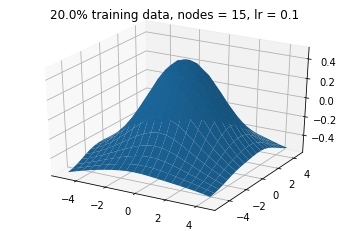

In [13]:
_, out = tlp.forward_pass(data)
Z2 = out.reshape(20,20)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z2)
plt.title(f'{100*p}% training data, nodes = {nodes}, lr = {lr}')
plt.show()